In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow import keras
import numpy as np
# from sklearn.model_selection import train_test_split

# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
def build(input_shape, no_classes):
    model = models.Sequential()
    model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.3))
    ##
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.3))
    ##
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.3))
    ##
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.3))
    ##
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(no_classes, activation='softmax'))
    ##
    return model

In [6]:
model = build(x_train.shape[1:], 10)

In [7]:
# model.summary()

In [8]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
import time
##
convergence_accuracy_diff = 0.002
set_size = x_train.shape[0]
train_set_errors = []
test_set_errors = []
training_time_to_convergence = []
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.save_weights('model.h5')
##########
for sampling_ratio in range(2,21,2):
  sample_no = np.arange(set_size)
  sample_no = np.random.choice(sample_no, int(set_size/sampling_ratio), replace=False)
  x_train_new = x_train[sample_no]
  y_train_new = y_train[sample_no]
  mean = np.mean(x_train_new,axis=(0,1,2,3))
  std = np.std(x_train_new,axis=(0,1,2,3))
  x_train_new = (x_train_new-mean)/(std+1e-7)
  x_test_new = (x_test-mean)/(std+1e-7)
  converge = False
  old_acc = 0
  num_epoch_to_converge = 0
  model.load_weights('model.h5')
  train_error_curve = []
  test_error_curve = []
  train_time = 0
  start = time.time()
  while converge==False:
    num_epoch_to_converge += 1
    start = time.time()
    hist = model.fit(x_train_new, y_train_new, batch_size=64, epochs=1, verbose=1)
    end = time.time()
    train_time += (end - start)
    new_acc = hist.history['accuracy'][-1]
    if (new_acc - old_acc) < convergence_accuracy_diff:
      converge = True
    old_acc = new_acc
    new_train_error = (1 - new_acc)*100
    train_error_curve.append(new_train_error)
    ##
    _, new_test_accuracy = model.evaluate(x_test_new, y_test)
    new_test_error = (1 - new_test_accuracy)*100
    test_error_curve.append(new_test_error)
    ##
  train_set_errors.append(train_error_curve)
  test_set_errors.append(test_error_curve)
  training_time_to_convergence.append(train_time)

313/313 [==============================] - 1s 4ms/step - loss: 1.7250 - accuracy: 0.4098


In [10]:
import matplotlib.pyplot as plt

Sampling ratio = 2, Train set error = 6.92
Sampling ratio = 4, Train set error = 7.27
Sampling ratio = 6, Train set error = 13.37
Sampling ratio = 8, Train set error = 9.76
Sampling ratio = 10, Train set error = 12.24
Sampling ratio = 12, Train set error = 25.71
Sampling ratio = 14, Train set error = 22.99
Sampling ratio = 16, Train set error = 14.75
Sampling ratio = 18, Train set error = 26.68
Sampling ratio = 20, Train set error = 42.80
Sampling ratio = 2, Test set error = 19.60
Sampling ratio = 4, Test set error = 24.76
Sampling ratio = 6, Test set error = 30.04
Sampling ratio = 8, Test set error = 34.08
Sampling ratio = 10, Test set error = 39.93
Sampling ratio = 12, Test set error = 43.52
Sampling ratio = 14, Test set error = 43.92
Sampling ratio = 16, Test set error = 46.25
Sampling ratio = 18, Test set error = 47.83
Sampling ratio = 20, Test set error = 59.02


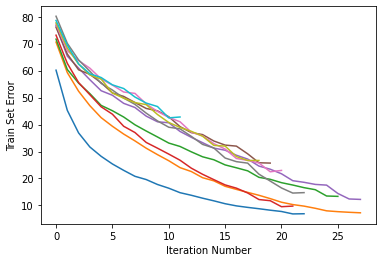

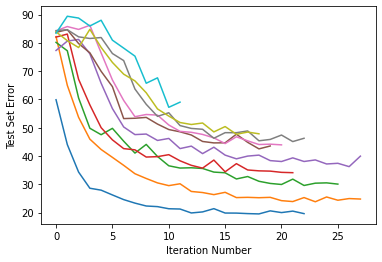

In [18]:
#plotting
for y in train_set_errors:
  plt.plot(y)
  plt.xlabel('Iteration Number')
  plt.ylabel('Train Set Error')
plt.figure()
for y in test_set_errors:
  plt.plot(y)
  plt.xlabel('Iteration Number')
  plt.ylabel('Test Set Error')
#errors
for i in range(10):
  y = train_set_errors[i][-1]
  sampling_ratio = (i+1)*2
  print('Sampling ratio = {}, Train set error = {:0.2f}'.format(sampling_ratio, y))
print('================================================================================')
for i in range(10):
  y = test_set_errors[i][-1]
  sampling_ratio = (i+1)*2
  print('Sampling ratio = {}, Test set error = {:0.2f}'.format(sampling_ratio, y))